In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data_train = pd.read_csv('DailyDelhiClimateTrain.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

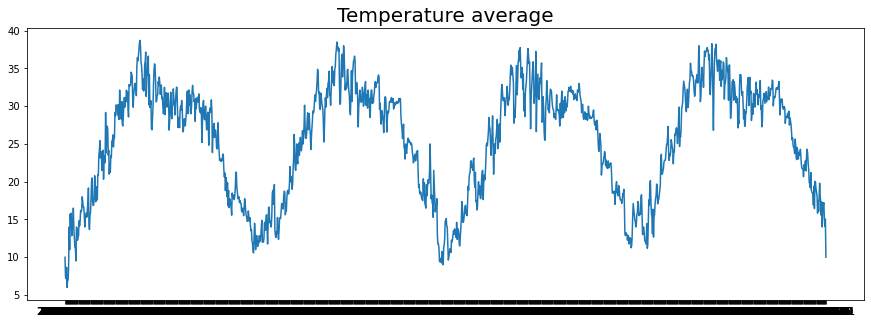

In [4]:
dates = data_train['date'].values
temp  = data_train['meantemp'].values
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [6]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [7]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

C:\Users\Azhar Rizky Zulma\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
15/15 [==============================] - 23s 238ms/step - loss: 25.3360 - mae: 25.8360
Epoch 2/100
15/15 [==============================] - 2s 116ms/step - loss: 25.2995 - mae: 25.7995
Epoch 3/100
15/15 [==============================] - 2s 125ms/step - loss: 25.2552 - mae: 25.7552
Epoch 4/100
15/15 [==============================] - 2s 117ms/step - loss: 25.2038 - mae: 25.7038
Epoch 5/100
15/15 [==============================] - 2s 114ms/step - loss: 25.1465 - mae: 25.6465
Epoch 6/100
15/15 [==============================] - 3s 198ms/step - loss: 25.0852 - mae: 25.5852
Epoch 7/100
15/15 [==============================] - 5s 269ms/step - loss: 25.0189 - mae: 25.5189
Epoch 8/100
15/15 [==============================] - 4s 235ms/step - loss: 24.9468 - mae: 25.4468
Epoch 9/100
15/15 [==============================] - 4s 236ms/step - loss: 24.8680 - mae: 25.3680
Epoch 10/100
15/15 [==============================] - 4s 229ms/step - loss: 24.7813 - mae: 25.2813
Epoch 11/100
15/15

Epoch 84/100
15/15 [==============================] - 3s 192ms/step - loss: 1.0985 - mae: 1.5312
Epoch 85/100
15/15 [==============================] - 3s 186ms/step - loss: 1.0782 - mae: 1.5063
Epoch 86/100
15/15 [==============================] - 3s 189ms/step - loss: 1.1831 - mae: 1.6112 1s - loss: 1.2640 - m
Epoch 87/100
15/15 [==============================] - 3s 177ms/step - loss: 1.1785 - mae: 1.6102
Epoch 88/100
15/15 [==============================] - 3s 189ms/step - loss: 1.1036 - mae: 1.5352 1s - loss: 1.1051 - 
Epoch 89/100
15/15 [==============================] - 3s 192ms/step - loss: 1.0984 - mae: 1.5294
Epoch 90/100
15/15 [==============================] - 3s 182ms/step - loss: 1.1043 - mae: 1.5340 2s - loss: 1.0990
Epoch 91/100
15/15 [==============================] - 3s 187ms/step - loss: 1.0868 - mae: 1.5140
Epoch 92/100
15/15 [==============================] - 3s 197ms/step - loss: 1.0841 - mae: 1.5117
Epoch 93/100
15/15 [==============================] - 4s 212ms/ste